### Import Libraries

In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "2"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

### Generating Synthetic Dataset

In [3]:
nsamples = 300
nfeatures = 2
nclusters = 4
randomstate = 42

In [4]:
X, y_true = make_blobs(n_samples = nsamples, centers = nclusters,
                      n_features = nfeatures, random_state = randomstate)

### Visualize the dataset

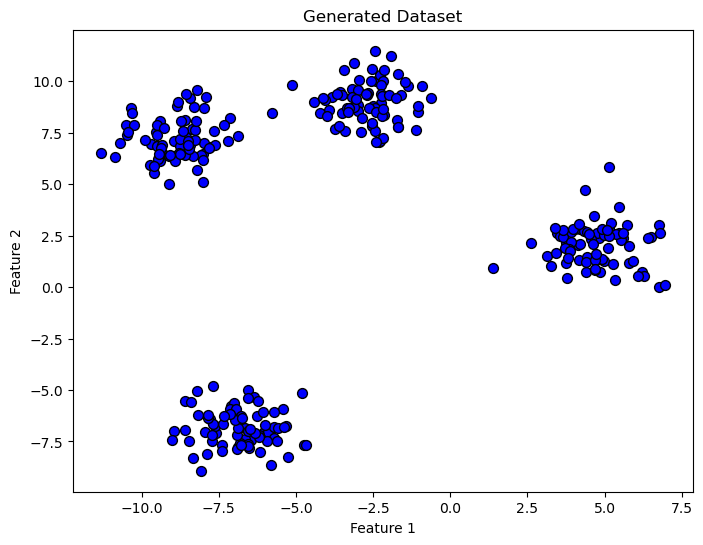

In [5]:
plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], X[:, 1], c = 'blue', s = 50, marker = 'o', edgecolor = 'k')
plt.title("Generated Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Perform K Means Clustering

In [6]:
kmeans = KMeans(n_clusters = nclusters, random_state = randomstate)
y_kmeans = kmeans.fit_predict(X)

### Visualize the Clustering Results

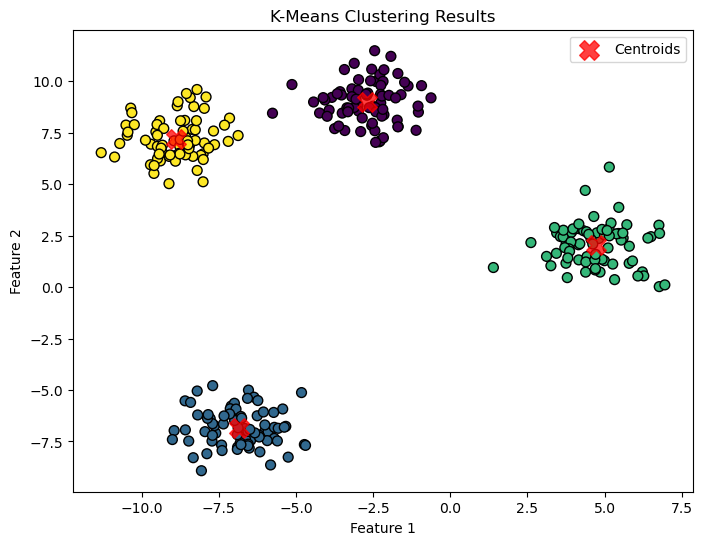

In [7]:
plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis',
           marker = 'o', edgecolor = 'k')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.75,
           marker = 'X', label = "Centroids")
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend()
plt.show()

### Evaluate the model

_Inertia measures how well the data points are grouped_

In [8]:
print(f"Inertia(sum of squared distances to closest cluster center): {kmeans.inertia_}")

Inertia(sum of squared distances to closest cluster center): 564.9141808210252


### Using the Elbow Method to determine the optimal number of clusters

In [9]:
inertia_values = []
cluster_range = range(1, 10)

In [10]:
for k in cluster_range:
    km = KMeans(n_clusters = k, random_state = randomstate)
    km.fit(X)
    inertia_values.append(km.inertia_)

#### Plotting the Elbow Curve

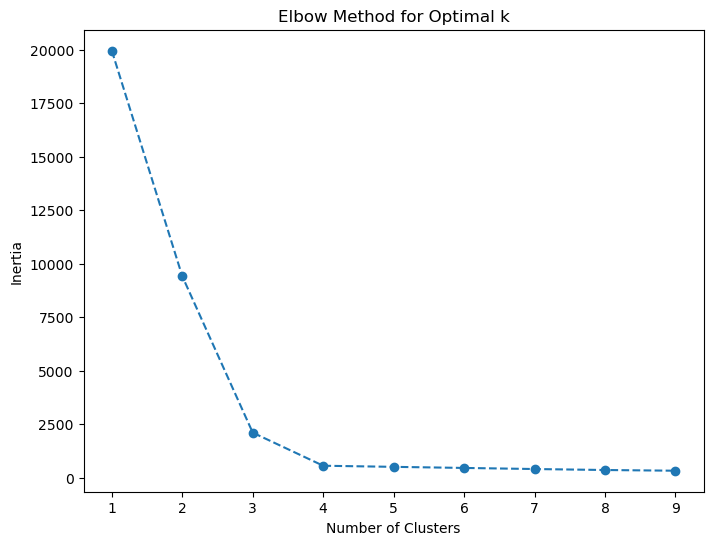

In [11]:
plt.figure(figsize = (8, 6))
plt.plot(cluster_range, inertia_values, marker = 'o', linestyle = '--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()